In [1]:
import numpy as np                   # import numpy package under shorthand "np"
import pandas as pd                  # import pandas package under shorthand "pd"
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation metrics

In [2]:
redData = pd.read_csv("winequality-red.csv", sep=';')
#whiteData = pd.read_csv("winequality-white.csv", sep=';')
print(redData.head())
print(redData.columns)
print(redData.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Text(0, 0.5, 'Counts')

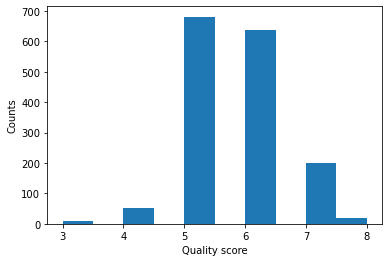

In [3]:
quality = redData['quality']
plt.hist(quality)
plt.xlabel('Quality score')
plt.ylabel('Counts')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-pack

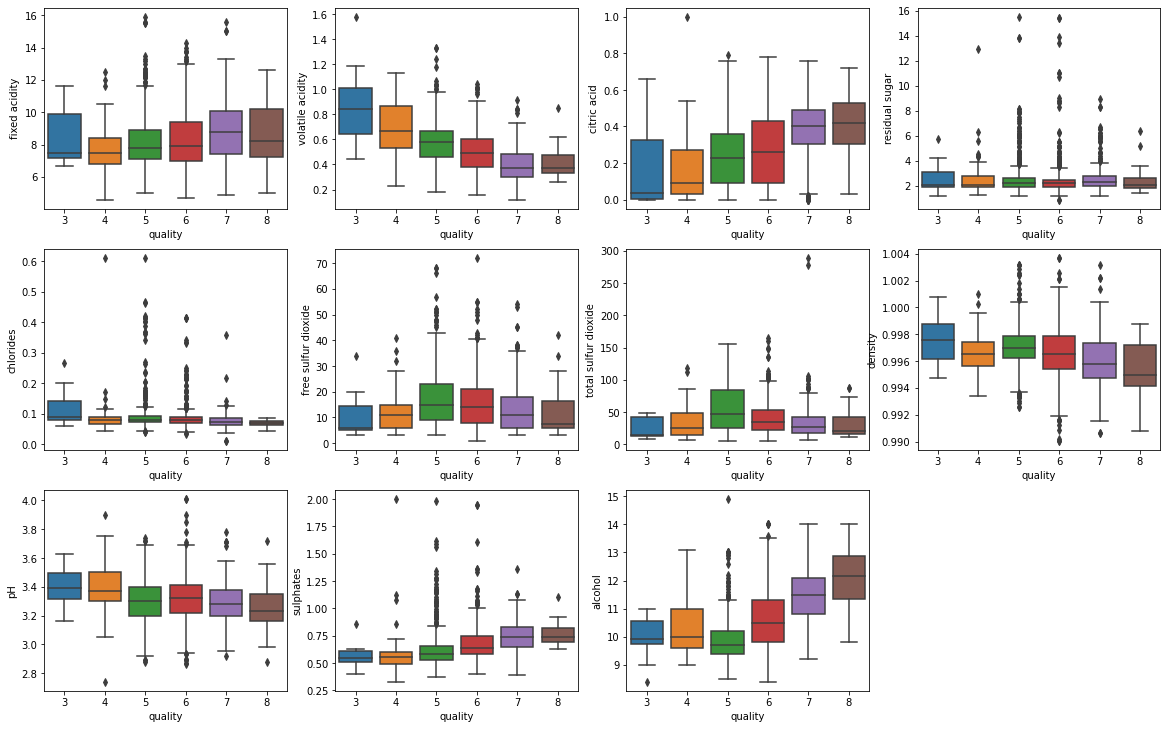

In [4]:
plt.figure(figsize=(20,17))

for i,features in enumerate(redData.drop(['quality'],axis=1)):
    plt.subplot(4,4,i+1)
    sns.boxplot(quality, redData[features])


plt.show()

In [5]:
labels = [1, 2, 3] # 3 = good, 2 = ok, 1 = bad
cutIntervals = [quality.min(), 5, 6, quality.max()]
cuttedLabel = pd.cut(quality, bins=cutIntervals, labels=labels)

In [11]:
# Under construction
X = redData[['volatile acidity','citric acid','chlorides','sulphates','alcohol']].to_numpy().reshape(-1,1)
y = cuttedLabel.to_numpy()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
tr_acc = []          
val_acc = []
    
    
# We use the kfold object created earlier, to obtain train and validation sets 
# for k iterations of training and evaluation
for (train_indices, val_indices) in enumerate(kfold.split(X)): 
    # Define the training and validation data using the indices returned by kfold and numpy indexing 
        
    X_train, y_train, X_val, y_val = X[train_indices], y[train_indices], X[val_indices], y[val_indices]
        
    DTclassifier = DecisionTreeClassifier(criterion = 'entropy')
    DTclassifier.fit(X_train, y_train)

    # Now we compute the errors on train and validation data obtained from kfold
    y_pred_train = DTclassifier.predict(X_train)    
    tr_acc = accuracy_score(y_train, y_pred_train)    
    y_pred_val = DTclassifier.predict(X_val) 
    val_acc = accuracy_score(y_val, y_pred_val) 
        
    tr_accs.append(tr_acc) # # NB - We save all the errors to analyze later
    val_accs.append(val_acc)




IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (6396,) (1599,) 